In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import pickle

In [17]:
# Read the SQL query output into a pandas DataFrame
df = pd.read_csv('../Queries/forecast.csv')

In [18]:
df.head()

,customer_id,product_name,total_sales,avg_product_price,num_orders,num_products
0,1,Camp Collared,392,112.0,2,2
1,1,Leather,294,113.0,2,2
2,1,Pullover,455,114.0,1,2
3,10,Relaxed Leg,270,95.0,1,1
4,18,Cardigan,224,118.0,1,1


In [19]:
df.describe()

,customer_id,total_sales,avg_product_price,num_orders,num_products
count,1527.000000,1527.000000,1527.000000,1527.000000,1527.000000
mean,532.726916,226.442043,105.817180,1.026850,1.097577
std,267.752266,113.756110,9.671081,0.161698,0.328287
min,1.000000,90.000000,90.000000,1.000000,1.000000
25%,326.000000,113.000000,96.000000,1.000000,1.000000
50%,553.000000,212.000000,109.000000,1.000000,1.000000
75%,754.000000,297.000000,114.000000,1.000000,1.000000
max,998.000000,1060.000000,119.000000,2.000000,4.000000


In [20]:
# Define the features and target variable
X = df[['total_sales', 'avg_product_price', 'num_orders', 'num_products']]
y = df['total_sales']

In [21]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Save the trained model as a pickle file
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [24]:
# Evaluate the model on the testing set
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X_test)
print('R-squared:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

R-squared: 1.0
MSE: 4.364329132529402e-27


In [25]:
# Load the trained model from the pickle file
with open('trained_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [26]:
# Load the new data into a pandas DataFrame
new_data = pd.read_csv('../Queries/new_data.csv')

In [27]:
# Use the trained model to make predictions on the new data
X_new = new_data[['total_sales', 'avg_product_price', 'num_orders', 'num_products']]
y_pred = model.predict(X_new)

In [28]:
# Print the predicted sales for the new data
print('Predicted sales for new data:', y_pred)

Predicted sales for new data: [318. 182. 119. ... 113. 188. 204.]


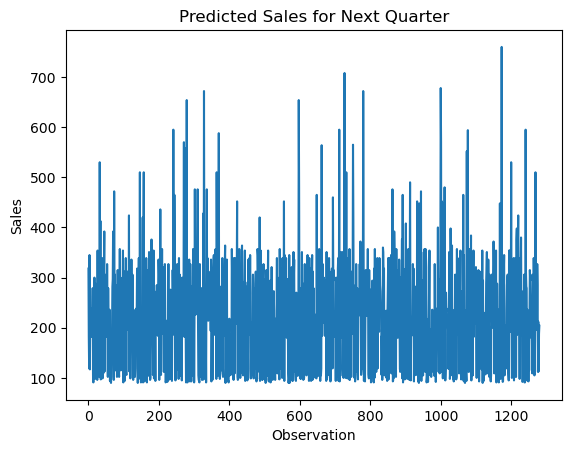

In [31]:
import matplotlib.pyplot as plt

# Plot the predicted sales values
plt.plot(y_pred)
plt.title('Predicted Sales for Next Quarter')
plt.xlabel('Observation')
plt.ylabel('Sales')
plt.show()

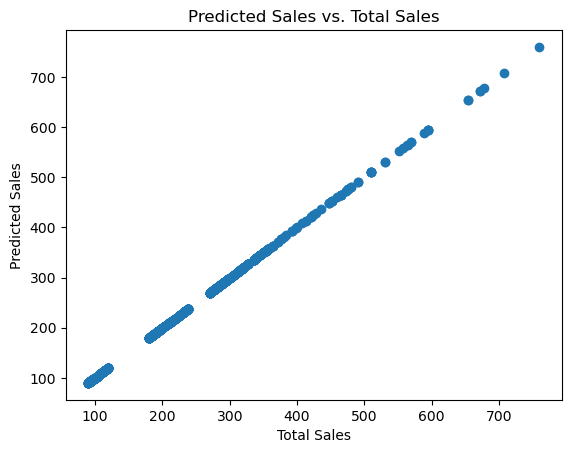

In [36]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt


# Read the SQL query output into a pandas DataFrame
df = pd.read_csv('../Queries/forecast.csv')

# Define the features and target variable
X = df[['total_sales']]
y = df['total_sales']

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Save the model as a pickle file
with open('sales_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load the model from the pickle file
with open('sales_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Make predictions on new data
X_new = new_data[['total_sales']]
y_pred = model.predict(X_new)

# Create a scatter plot of predicted sales values
plt.scatter(X_new, y_pred)
plt.xlabel('Total Sales')
plt.ylabel('Predicted Sales')
plt.title('Predicted Sales vs. Total Sales')
plt.show()

In [37]:
# Print the predicted sales for the new data
print('Predicted sales for new data:', y_pred)

Predicted sales for new data: [318. 182. 119. ... 113. 188. 204.]


In [38]:
# Save predicted sales values as CSV file
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted Sales'])
y_pred_df.to_csv('predicted_sales.csv', index=False)